In [10]:
#分析套件
import twstock
import talib

#基本設定
import numpy as np
import pandas as pd
import datetime

#繪製圖型
import mpl_finance as mpf
import matplotlib.pyplot as plt
%matplotlib inline


In [101]:
#取得5478資料並轉為dataframe
stock_5478 = twstock.Stock('5478')
stock_5478_2018 = stock_5478.fetch_from(2018, 6)
stock_5478_2018_pd = pd.DataFrame(stock_5478_2018)
stock_5478_2018_pd = stock_5478_2018_pd.set_index('date')

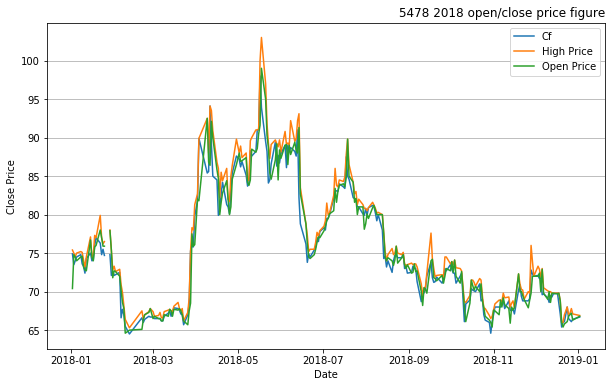

In [36]:
#繪製開收盤圖
fig = plt.figure(figsize=(10, 6))
plt.plot(stock_5478_2018_pd.close, '-', label='Cf')
plt.plot(stock_5478_2018_pd.high, '-', label='High Price')
plt.plot(stock_5478_2018_pd.open, '-', label='Open Price')
plt.title('5478 2018 open/close price figure', loc='right')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True, axis='y')
plt.legend()

[Text(0,0,'2018-06-01'),
 Text(0,0,'2018-06-15'),
 Text(0,0,'2018-07-02'),
 Text(0,0,'2018-07-16'),
 Text(0,0,'2018-07-30'),
 Text(0,0,'2018-08-13'),
 Text(0,0,'2018-08-27'),
 Text(0,0,'2018-09-10'),
 Text(0,0,'2018-09-25'),
 Text(0,0,'2018-10-09'),
 Text(0,0,'2018-10-24'),
 Text(0,0,'2018-11-07'),
 Text(0,0,'2018-11-21'),
 Text(0,0,'2018-12-05'),
 Text(0,0,'2018-12-19')]

/Users/chenyao/anaconda3/envs/pythonenv/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


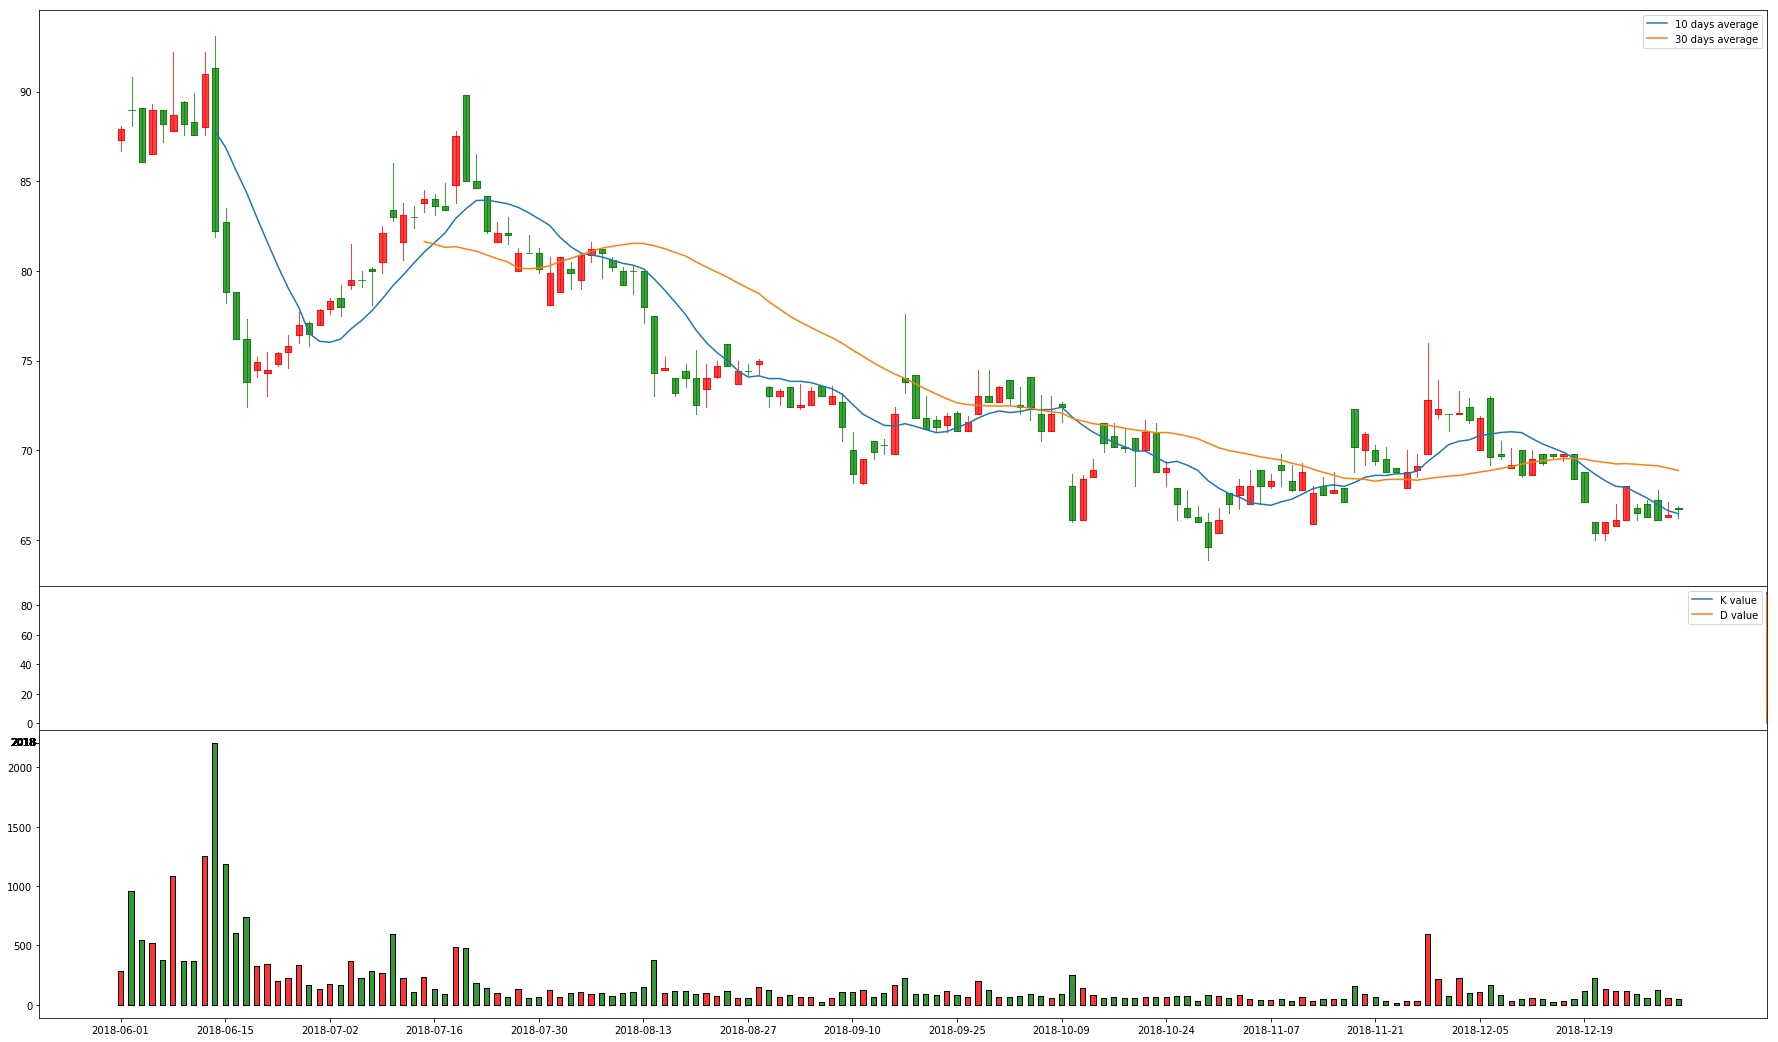

In [122]:
#取得一整年的資料
stock_5478_2018_pd_index = stock_5478_2018_pd.index.format(formatter=lambda x: x.strftime('%Y-%m-%d'))

stock_5478_2018_pd.dropna()
fig = plt.figure(figsize=(24, 20))
ax = fig.add_axes([0, 0.3, 1, 0.4])
ax2 = fig.add_axes([0, 0.2, 1, 0.1])
ax3 = fig.add_axes([0, 0, 1, 0.2])

#繪製Ｋ線圖
ax.set_xticks(range(0, len(stock_5478_2018_pd_index), 10))
ax.set_xticklabels(stock_5478_2018_pd_index[::10])
mpf.candlestick2_ochl(ax, stock_5478_2018_pd.open, stock_5478_2018_pd.close, stock_5478_2018_pd.high,
                      stock_5478_2018_pd.low, width=0.6, colorup='r', colordown='g', alpha=0.75)

#繪製均線
sma_10 = talib.SMA(np.array(stock_5478_2018_pd.close), 10)
sma_30 = talib.SMA(np.array(stock_5478_2018_pd.close), 30)
#plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10 days average')
ax.plot(sma_30, label='30 days average')
ax.legend()

#計算KD
stock_5478_2018_pd['k'], stock_5478_2018_pd['d'] = talib.STOCH(stock_5478_2018_pd.high, stock_5478_2018_pd.low, stock_5478_2018_pd.close)
stock_5478_2018_pd['k'].fillna(value=0, inplace=True)
stock_5478_2018_pd['d'].fillna(value=0, inplace=True)

#繪製KD圖
ax2.plot(stock_5478_2018_pd['k'], label='K value')
ax2.plot(stock_5478_2018_pd['d'], label='D value')
ax2.set_xticks(range(0, len(stock_5478_2018_pd_index), 10))
ax2.set_xticklabels(stock_5478_2018_pd_index[::10])
ax2.legend()

#繪製成交量
mpf.volume_overlay(ax3, stock_5478_2018_pd.open, stock_5478_2018_pd.close, stock_5478_2018_pd.transaction, colorup='r', colordown='g', width=0.5, alpha=0.8)
ax3.set_xticks(range(0, len(stock_5478_2018_pd_index), 10))
ax3.set_xticklabels(stock_5478_2018_pd_index[::10])



In [124]:
def stockFig(stock_code, year, month):
    stock = twstock.Stock(stock_code)
    stock_year = stock.fetch_from(year, month)
    stock_year_pd = pd.DataFrame(stock_year)
    stock_year_pd = stock_year_pd.set_index('date')
    stock_year_pd_index = stock_year_pd.index.format(formatter=lambda x: x.strftime('%Y-%m-%d'))
    
    stock_year_pd.dropna()
    fig = plt.figure(figsize=(24, 20))
    ax = fig.add_axes([0, 0.3, 1, 0.4])
    ax2 = fig.add_axes([0, 0.2, 1, 0.1])
    ax3 = fig.add_axes([0, 0, 1, 0.2])

    
    #繪製Ｋ線圖
    ax.set_xticks(range(0, len(stock_year_pd_index), 10))
    ax.set_xticklabels(stock_year_pd_index[::10])
    mpf.candlestick2_ochl(ax, stock_year_pd.open, stock_year_pd.close, stock_year_pd.high,
                          stock_year_pd.low, width=0.6, colorup='r', colordown='g', alpha=0.75)

    #繪製均線
    sma_10 = talib.SMA(np.array(stock_year_pd.close), 10)
    sma_30 = talib.SMA(np.array(stock_year_pd.close), 30)
    #plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
    ax.plot(sma_10, label='10 days average')
    ax.plot(sma_30, label='30 days average')
    ax.legend()

    #計算KD
    stock_year_pd['k'], stock_year_pd['d'] = talib.STOCH(stock_year_pd.high, stock_year_pd.low, stock_year_pd.close)
    stock_year_pd['k'].fillna(value=0, inplace=True)
    stock_year_pd['d'].fillna(value=0, inplace=True)

    #繪製KD圖
    ax2.plot(stock_year_pd['k'], label='K value')
    ax2.plot(stock_year_pd['d'], label='D value')
    ax2.legend()
    
    #繪製成交量
    mpf.volume_overlay(ax3, stock_year_pd.open, stock_year_pd.close, stock_year_pd.transaction, colorup='r', colordown='g', width=0.5, alpha=0.8)
    ax3.set_xticks(range(0, len(stock_year_pd_index), 10))
    ax3.set_xticklabels(stock_year_pd_index[::10])

    

/Users/chenyao/anaconda3/envs/pythonenv/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


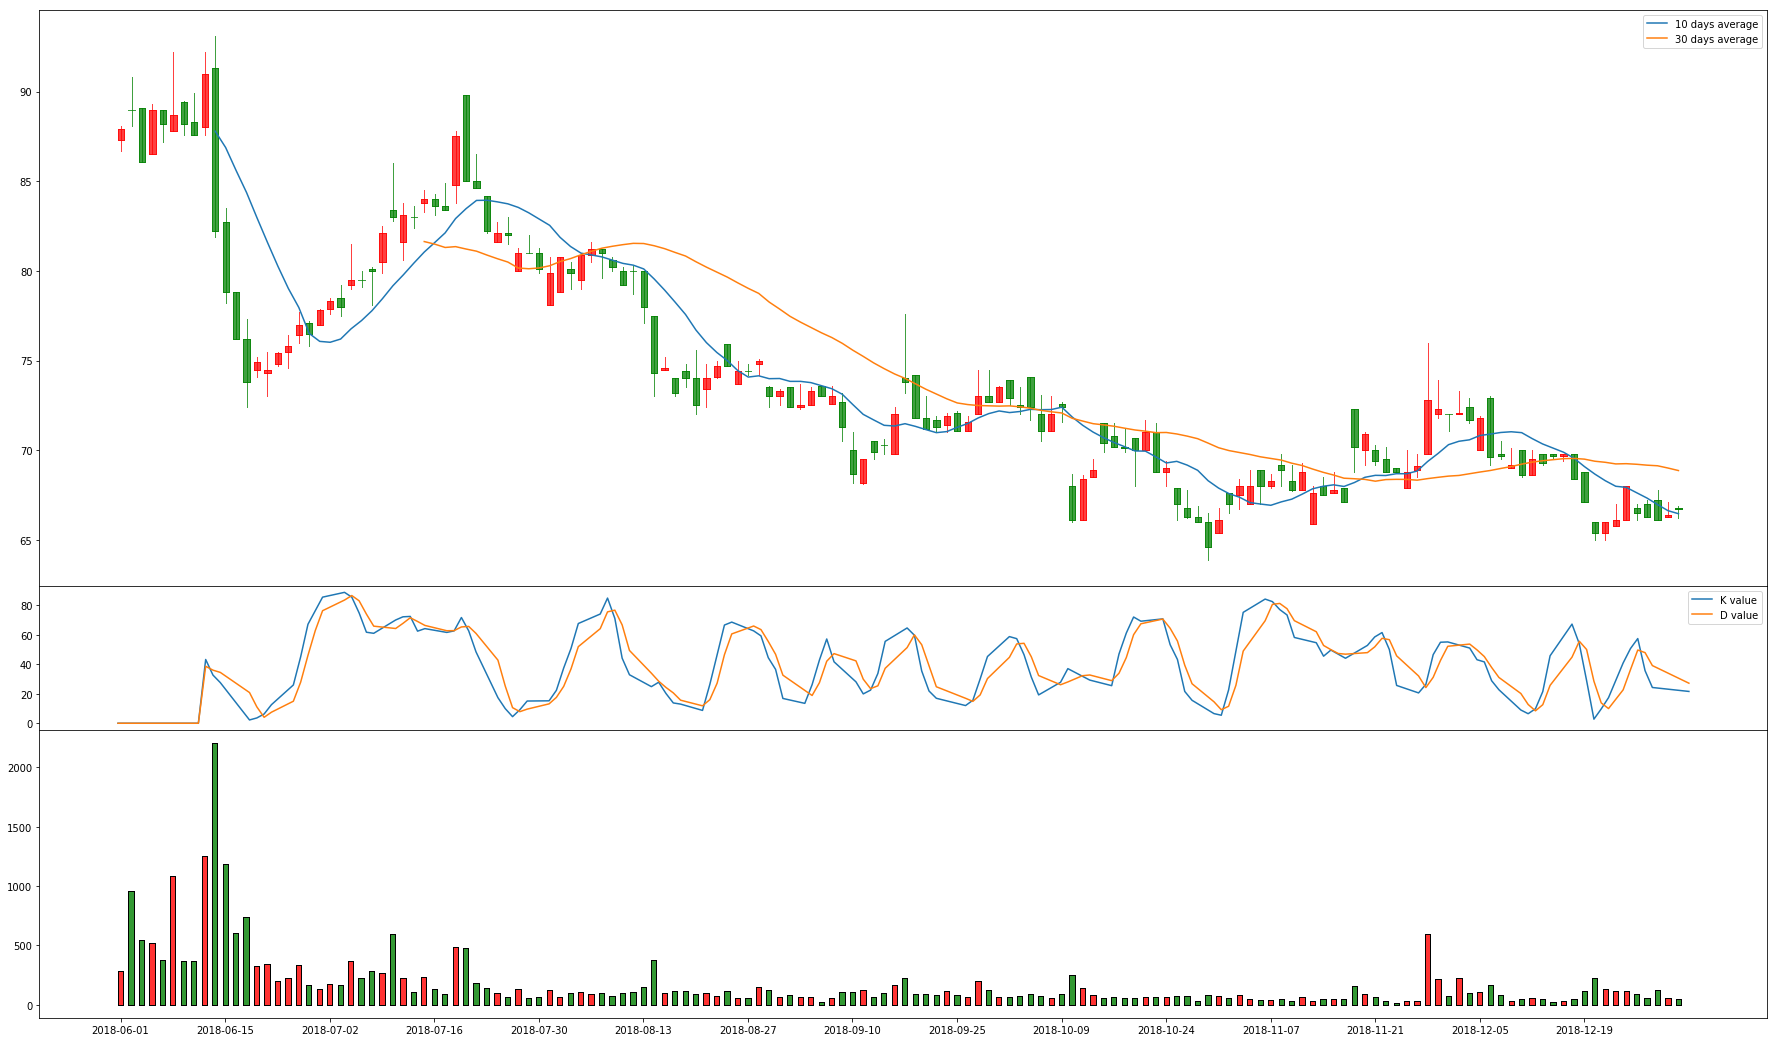

In [125]:
stockFig('5478', 2018, 6)

/Users/chenyao/anaconda3/envs/pythonenv/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


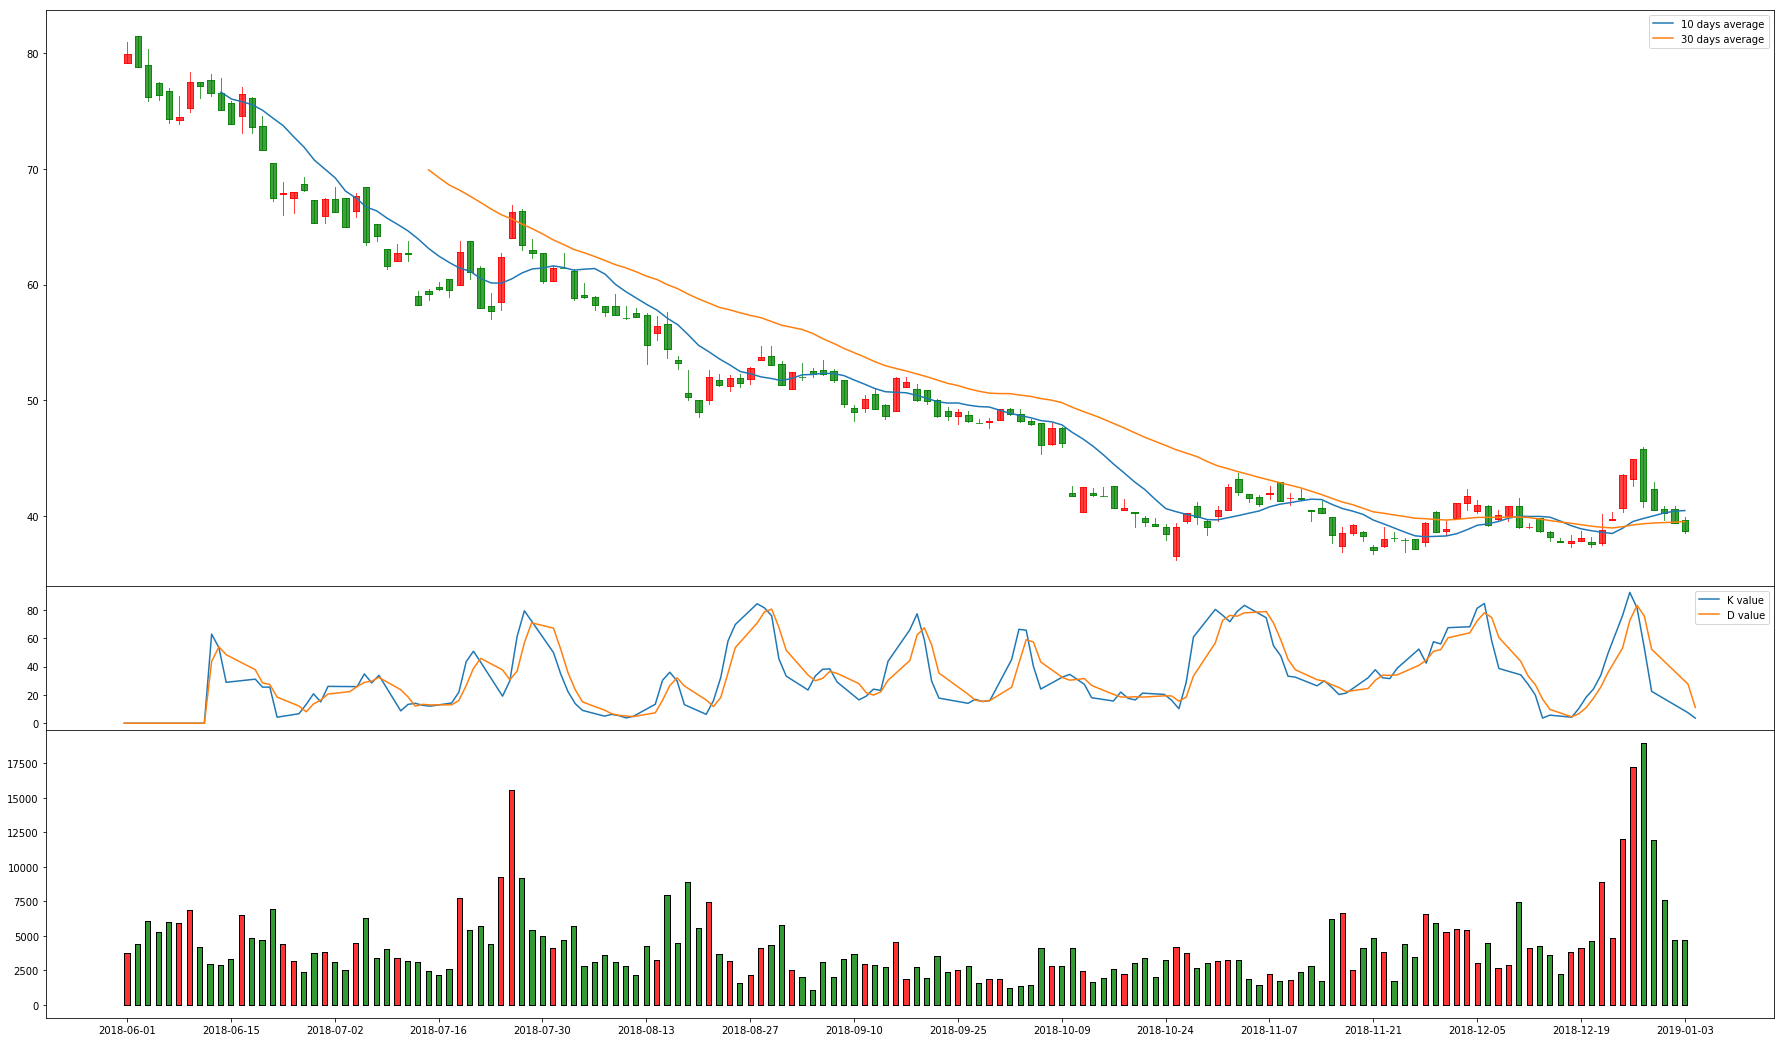

In [126]:
stockFig('2376', 2018, 6)